## ColPali API simulation

In [1]:
# importing libraries
from byaldi import RAGMultiModalModel
import base64
import matplotlib.pyplot as plt
from PIL import Image
import os
# pip install transformers -U

/home/ecmdev/anaconda3/envs/rag_sim/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading files (vectorizing the data and saving the embeddings in byaldi)

In [2]:
RAG = RAGMultiModalModel.from_pretrained("./colpali-v1.2", verbose=1)
# loading model = GPU Memory Usage 5892MiB 

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


In [2]:
## retrieving single index from byaldi library
# RAG = RAGMultiModalModel.from_index("APPLE")

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


You are using in-memory collection. This means every image is stored in memory.
You might want to rethink this if you have a large collection!
Loaded 540 images from 2 JSON files.


/home/ecmdev/anaconda3/envs/rag_sim/lib/python3.10/site-packages/byaldi/colpali.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.indexed_embeddings.extend(torch.lo

In [3]:
file_name = {"APPLE":"Beyond the blast furnace 1992.pdf",
             "BANANA":"Iron Making Text Book 2008.pdf",
             "CAT":"Principles of Blast Furnace Ironmaking.Biswas.1981.pdf",
             "DOG":"The Iron Blast Furnace - Theory and Practice 1979.pdf"}
file_dir = "ref_documents/"

In [ ]:
# Test indexing
# metadata = [{"filename":file_name} for file_name in os.listdir("docs")]

index_name = "250122_index"
RAG.index(
    input_path="ref_documents/",
    index_name=index_name,
    store_collection_with_index=False,
    # doc_ids=[x for x in range(len(file_name))],
    # metadata=file_name,
    overwrite=True
)
## loading 4 files GPU usage 6724MiB

Indexing file: ref_documents/Iron Making Text Book 2008.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to index.
Added page 25 of document 0 to index.

{0: 'ref_documents/Iron Making Text Book 2008.pdf',
 1: 'ref_documents/Principles of Blast Furnace Ironmaking.Biswas.1981.pdf',
 2: 'ref_documents/Beyond the blast furnace 1992.pdf',
 3: 'ref_documents/The Iron Blast Furnace - Theory and Practice 1979.pdf'}

In [14]:
# ## 20250114
# ## loading multiple files to index individually

# for name, url in file_name.items():
#     print(f"Loading....index {name}")

#     # if i ==0:
#     #     RAG.index(
#     #         input_path= file_dir+url,
#     #         index_name= name, #"korean_doc",
#     #         store_collection_with_index=True,
#     #         overwrite=True
#     #     )
#     # else:
#     RAG.index(
#         input_path= file_dir+url,
#         index_name=name
#     )
#     print(f"====DONE====")

# RAG.index
# #input file = GPU M<mory Usage 6724MiB (540 pages-4m38s)

Loading....index BANANA
Added page 1 of document 1 to index.
Added page 2 of document 1 to index.
Added page 3 of document 1 to index.
Added page 4 of document 1 to index.
Added page 5 of document 1 to index.
Added page 6 of document 1 to index.
Added page 7 of document 1 to index.
Added page 8 of document 1 to index.
Added page 9 of document 1 to index.
Added page 10 of document 1 to index.
Added page 11 of document 1 to index.
Added page 12 of document 1 to index.
Added page 13 of document 1 to index.
Added page 14 of document 1 to index.
Added page 15 of document 1 to index.
Added page 16 of document 1 to index.
Added page 17 of document 1 to index.
Added page 18 of document 1 to index.
Added page 19 of document 1 to index.
Added page 20 of document 1 to index.
Added page 21 of document 1 to index.
Added page 22 of document 1 to index.
Added page 23 of document 1 to index.
Added page 24 of document 1 to index.
Added page 25 of document 1 to index.
Added page 26 of document 1 to inde

<bound method RAGMultiModalModel.index of <byaldi.RAGModel.RAGMultiModalModel object at 0x7fc4db75fb20>>

### Loading saved embeddings from byaldi

In [2]:
## retrieving index of multiple documents from byaldi library
RAG = RAGMultiModalModel.from_index("250122_index")
## 5892MiB

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]
/home/ecmdev/anaconda3/envs/rag_sim/lib/python3.10/site-packages/byaldi/colpali.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues relate

In [3]:
rag_doc_list = RAG.get_doc_ids_to_file_names()
rag_doc_list

{0: 'ref_documents/Iron Making Text Book 2008.pdf',
 1: 'ref_documents/Principles of Blast Furnace Ironmaking.Biswas.1981.pdf',
 2: 'ref_documents/Beyond the blast furnace 1992.pdf',
 3: 'ref_documents/The Iron Blast Furnace - Theory and Practice 1979.pdf'}

In [19]:
rag_doc_list[0]

'ref_documents/Iron Making Text Book 2008.pdf'

##### work on list of queries

In [3]:
query_file = 'data/250113_query_list.txt'

## open query list file
with open(query_file, 'r') as f:
    query_list = f.readlines()
f.close()

In [4]:
query_list

['2025/01/13 first set of queries\n',
 'When molten iron temperature is 1400℃, what should the C-S ratio be for optimal output?\n',
 'When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?\n',
 'How much does the reducing agent ratio decrease when the average Top Gas temperature increases by 20°C?\n',
 'What is the ideal coke particle size for improving the fluidity of the melting matter at the hearth of the blast furnace?\n',
 'What actions can be taken to lower the Si(%)?\n',
 'What impact does the accretion have on the inside of the furnace?\n',
 'What operational actions should be taken to reduce the heat load on the blast furnace body?\n',
 'What operational effects occur when the Coke Wf-Di is below the standard level?\n',
 'When 5 tons of water spraying is applied to the furnace, how many tons of pulverized coal should be injected to compensate for the heat loss?\n',
 'What actions can be taken to prevent the bottom sidewall-temperature 

In [6]:
## name the file name that saves the RAG serch results
SAVE_WITH_MATCHING_NAME = False
if SAVE_WITH_MATCHING_NAME == True:
    file_name = query_file.split('/')[-1].split('.')[0]
    print(f"Saving generated answer to file name === {file_name}")
else:
    file_name = input()
    print(f"Saving generated answer to file name === {file_name}")



Saving generated answer to file name === 


In [14]:
## make folder of the new file name
if os.path.exists(f"search_results/{file_name}")==True:
    pass
else:
    os.mkdir(f"search_results/{file_name}")
    print(f"created folder dir === ./search_results/{file_name}")


created folder dir === ./search_results/250123_simulation_test


In [2]:
## whether to save the images
SAVING_FORMAT_OF_RESULTS = "file" #"file" # "image"
SHOW_IMAGE_RESULTS = False

In [24]:
if SAVING_FORMAT_OF_RESULTS == "file":
    result_file = f'search_results/{file_name}/{file_name}_results.txt'
    with open(result_file, 'w') as f:
        f.write(f"query_no\tquery\tdoc_id\tdoc_name\tsearch_rank\tsearched_page\tscore\n")
    f.close()
    print(f"File created :) ==== {result_file}")

File created :) ==== search_results/250123_simulation_test/250123_simulation_test_results.txt


In [25]:
for idx, query in enumerate(query_list[1:]):
    query = query.strip()
    print(idx, query)
    results = RAG.search(query, k=3)

    if SAVING_FORMAT_OF_RESULTS == "image":
        # view and save search results
        for i, result in enumerate(results):
            image_bytes = base64.b64decode(result.base64)
            pg = result.page_num

            filename = f'search_results/{file_name}/{file_name}_{idx}_{i}_{pg}.jpg'  # I assume you have a JPG file

            with open(filename, 'wb') as f:
                f.write(image_bytes)
            print('\t', filename)

            if SHOW_IMAGE_RESULTS == True:
                #display image
                im = Image.open(filename)
                plt.imshow(im)
                plt.axis('off')
                plt.show()

    elif SAVING_FORMAT_OF_RESULTS == "file":
        for i, result in enumerate(results):
            doc = result.doc_id
            doc_name = rag_doc_list[doc]
            pg = result.page_num
            sc = result.score

            with open (result_file, 'a') as f:
                f.write(f"{idx}\t{query}\t{doc}\t{doc_name}\t{i}\t{pg}\t{sc}\n")
                
            print(f"{idx}\t{query}\t{doc}\t{doc_name}\t{i}\t{pg}\t{sc}\n")
        


0 When molten iron temperature is 1400℃, what should the C-S ratio be for optimal output?
0	When molten iron temperature is 1400℃, what should the C-S ratio be for optimal output?	1	ref_documents/Principles of Blast Furnace Ironmaking.Biswas.1981.pdf	0	455	21.375

0	When molten iron temperature is 1400℃, what should the C-S ratio be for optimal output?	1	ref_documents/Principles of Blast Furnace Ironmaking.Biswas.1981.pdf	1	374	21.125

0	When molten iron temperature is 1400℃, what should the C-S ratio be for optimal output?	2	ref_documents/Beyond the blast furnace 1992.pdf	2	221	21.125

1 When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?
1	When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?	2	ref_documents/Beyond the blast furnace 1992.pdf	0	156	25.375

1	When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?	1	ref_documents/Principles of Blast Furnace I

#### work on individual queries

In [16]:
# query = "용선온도 1400℃ 조건에서는 C\S를 몇으로 관리하는게 출선에 좋을지?"
query = "When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?"

results = RAG.search(query, k=3)
results

[{'doc_id': 1, 'page_num': 156, 'score': 25.375, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 67, 'score': 25.25, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABnYAAAkjCAIAAACzq+aSAAEAAElEQVR4nOy9y3njSNLvDeqZ9VgA0QCWDIC4eZ+zqjYApAzo2X0riAawZQAFB1oGkKAB06s5s6FggIoGULCgDaC+RZzKNyrygsSFuJD/36IeFZnMjLxFRkbeJl9fXwEAAAAAAAAAAAAAAKAud30LAAAAAAAAAAAAAADAuIGLDQAAAAAAAAAAAACARvyjbwGqgWOtAAAAAAAAAAAAAFfPZDLpW4RqYBcbAAAAAAAAAAAAAACNgIsNAAAAAAAAAAAAAIBGwMUGAAAAAAAAAAAAAEAj4GIDAAAAAAAAAAAAAKARcLEBAAAAAAAAAAAAANAIuNgAAAAAAAAAAAAAAGgEXGwAAAAAAAAAAAAAADQCLjYAAAAAAAAAAAAAABoBFxsAAAAAAAAAAAAAAI2Aiw0AAAAAAAAAQNdMJpNWwnQfVbvBIFiPKXoGQ1vtK8XRARcbAAAAAEBrXL0VDru/xxQ9g413VtluMAjWY4qewb6+vloJ031U7QaDYD2m6BkMbbWvFEcHXGwAgHLGa4UP1qa8hRQ9g3W/zDXM4rqRChpmip7BPKO6eiscdn+PKXoGG++sst1gEKzHFP2DAQDANTEZl+4T0k4mXvK3GGyYKQ5TqhsR7EaKAgAAAAAAAAAA6JLRHSYd2ex6XNICAAAAAAAAAAAAgBqMzsWGg6IAAAAAAAAAAAAAADQCLjYAAAAAAAAAAAAAABoBFxsAAAAAAAAAAAAAAI2Aiw0AAAAAAAAAAAAAgEbAxQYAAAAAAAAAAAAAQCPgYgMAAAAAAAAAAAAAoBFwsQEA

[{'doc_id': 0, 'page_num': 67, 'score': 25.25,
 {'doc_id': 0, 'page_num': 357, 'score': 25.0,
  {'doc_id': 0, 'page_num': 116, 'score': 24.875,

search_results/When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?_results_0_67.jpg


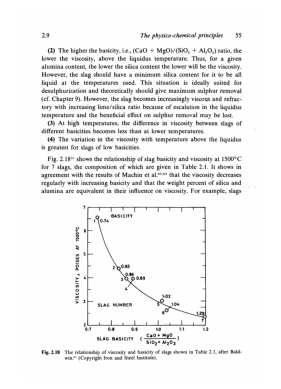

search_results/When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?_results_1_357.jpg


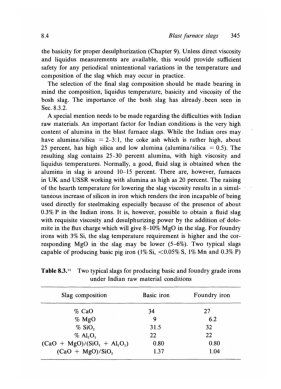

search_results/When molten iron temperature is 1500℃, how much of Al2O3 content for the optimal slag viscosity?_results_2_116.jpg


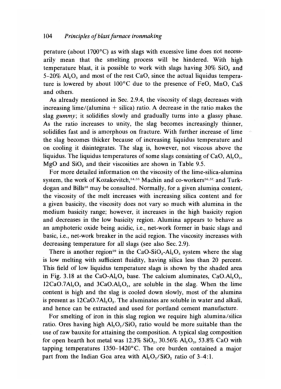

In [18]:
# view and save search results
for i, result in enumerate(results):
    image_bytes = base64.b64decode(result.base64)
    pg = result.page_num

    filename = f'search_results/{query}_results_{i}_{pg}.jpg'  # I assume you have a JPG file

    with open(filename, 'wb') as f:
        f.write(image_bytes)
    print(filename)

    #display image
    im = Image.open(filename)
    plt.imshow(im)
    plt.axis('off')
    plt.show()